In [4]:
#!pip3 install scikit-plot 

In [47]:
import Elmo_Model  as em 
import data_utilities as du
import numpy as np
from sklearn.metrics import confusion_matrix
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [48]:
survey_test= du.load_data('survey_articles.csv')

In [49]:
survey_test.shape

(19, 18)

In [50]:
survey_feat, survey_label= du.clean_and_pad(survey_test,500)


In [51]:
survey_feat= du.tok_to_str(survey_feat)
survey_feat[10]

'LOUIS BURKE | Culture | CONTACT  A 17-year study concluded removal song lyric regarding fictional character bringing fake gun school song Teenage Dirtbag Wheatus has, unfortunately, done nothing end gun violence USA.  The lyric question references ‘boyfriend’ stated ‘a dick’ ‘brings gun school,’ latter lyric edited radio, TV streaming edit clever way end gun violence without actually anything end gun violence.  Former president escaped Jim Henson puppet, George W. Bush stated finding particularly disappointing waiting results study come back anything stop gun violence USA.  “If replacing lyric make believe gun fake record scratch managed stop people getting access guns I’m sure else stop killing innocent Americans.”  Many Americans upset discover censoring lyric song featured soundtrack 2000 Jason Biggs film, Loser, groundbreaking impact US gun epidemic everyone hoping for.  In centre party disappointed Americans none lead singer Wheatus, Brendan B. Brown, hoped censorship biggest hit

In [53]:
# Clear and load model
model = None
model = em.build_model()
model.load_weights('ElmoModel.h5')

post_save_preds = model.predict(np.array(survey_feat, dtype=object)[0:20])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
elmo_embedding_layer_6 (Elmo (None, 1024)              4         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 1285      
Total params: 263,689
Trainable params: 263,689
Non-trainable params: 0
_________________________________________________________________


In [54]:
y_pred= np.argmax(post_save_preds, axis=1)
y_true= survey_label

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


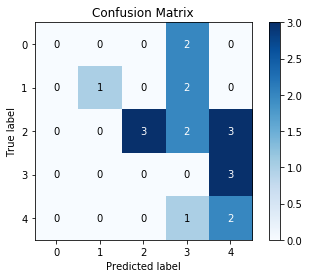

In [55]:
skplt.plot_confusion_matrix(y_true, y_pred)
plt.show()


In [56]:
accuracy_score(y_true, y_pred)

0.3157894736842105

In [57]:
for i in range (len(y_true)):
    if y_true[i]!=0:
        y_true[i]=1
    if y_pred[i]!=0:
        y_pred[i]=1
        

In [58]:
y_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [59]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
accuracy_score(y_true, y_pred)

0.8947368421052632

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


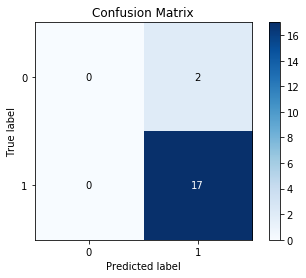

In [61]:
skplt.plot_confusion_matrix(y_true, y_pred)
plt.show()